# 1. Classification of hand writings

Here, I am going to classify hand writings into 0 to 9, 10 categories in total.

## Import Library

In [187]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## Load Dataset

In [6]:
digits = load_digits()
# check the components of digits
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Check the raw data

In [11]:
digits_data = digits.data

# shape
print(digits_data.shape)

# first one (8 x 8 -> 1 x 64)
digits_data[0]

(1797, 64)


array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

## Check the images of data

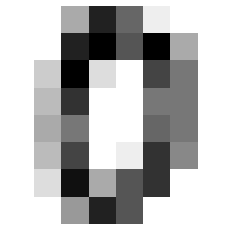

In [37]:
# rehape 1x63 formation into 8x8 to see the picture of hand writing
# plt.imshow(digits_data[0].reshape(8,8),cmap='binary')
plt.imshow(digits.images[0],cmap='binary')
plt.axis('off')
plt.show()

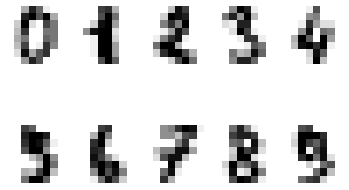

In [36]:
# first ten data
for i in range(10):
    plt.subplot(2,5,i+1) # grid 2 x 5
    plt.imshow(digits.images[i],cmap='binary')
    plt.axis('off')
plt.show()

## Check the label

In [28]:
digits_label = digits.target
print(digits_label.shape)
# unique value of the label
np.unique(digits_label)

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Split the data into train and test

In [175]:
x_train,x_test,y_train,y_test = train_test_split(digits_data,digits_label, 
                                                 test_size=0.2,
                                                shuffle = True,
                                                random_state=34)


print("x_train:{}".format(x_train.shape))
print("y_train:{}".format(y_train.shape))
print("x_test:{}".format(x_test.shape))
print("y_test:{}".format(y_test.shape))

x_train:(1437, 64)
y_train:(1437,)
x_test:(360, 64)
y_test:(360,)


## Select Optimum Models

- Stochastic Gradient Descent Classifier (SGD)
- Support Vector Machine (SVM)
- Random Forest: Multiple Decision Tree -> Ensemble
- Decision Tree
- Logistic Regression

In [200]:
def pt_accuracy(x_train,y_train,x_test,y_test,m_name,model):
    # train(fit) the model
    model.fit(x_train,y_train)
    # predict with test data
    y_pred = model.predict(x_test)
    # Accuracy of predicted value
    accuracy = accuracy_score(y_test,y_pred)
    
    print(m_name)
    print(accuracy)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

In [178]:
sgd_model = SGDClassifier()
svm_model = svm.SVC()
random_forest = RandomForestClassifier(random_state=32)
decision_tree = DecisionTreeClassifier(random_state=32)
logistic_model = LogisticRegression()

set_model = [sgd_model,svm_model,random_forest,decision_tree,logistic_model]
set_model_n = ['SGD','SVM','Random Forest','Decision Tree','Logistic']

for i in range(0,len(set_model)):
    pt_accuracy(x_train,y_train,x_test,y_test,set_model_n[i],set_model[i])

SGD
0.9166666666666666
[[37  0  0  0  0  0  0  0  1  0]
 [ 0 27  0  0  1  0  0  0  9  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  2  1]
 [ 0  0  0  0 38  0  0  0  1  0]
 [ 0  0  0  0  0 34  0  0  2  2]
 [ 0  0  0  0  0  0 32  0  2  0]
 [ 0  0  0  0  0  0  0 24  1  0]
 [ 0  1  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  1  6 21]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.96      0.73      0.83        37
           2       1.00      1.00      1.00        32
           3       1.00      0.94      0.97        47
           4       0.97      0.97      0.97        39
           5       1.00      0.89      0.94        38
           6       1.00      0.94      0.97        34
           7       0.96      0.96      0.96        25
           8       0.63      0.98      0.77        42
           9       0.88      0.75      0.81        28

    accuracy                           0.92       

/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Accuracy Score
- SGD: 91.7
- SVM: 98.6
- Random Forest: 97.2
- Decision Tree: 84.2
- Logistic Regression: 96.1

## Conclusion

1. Accuracy 자체는 SVM에서 가장 높았음.   
2. SGD는 1에 대한 recall이 낮은 편이었음. -> 1과 8 헷갈려함
3. Decision Tree는 전반적으로 Accuracy, precision, recall 낮은 편이었으며, 특히 8을 어려워한 것으로 보임.
- Logistic Regression에서는 5와 9를 헷갈려함   
=> 모델은 SVM이나 random forest 사용하면 될 것 같음.   
=> 다른 모델 성능을 높이고 싶다면, 1과 8을 헷갈려하는 이유를 찾아서 개선하면 될 듯.

In [114]:
# 1과 8에 대한 비율 확인
prop = pd.crosstab(y_train,columns="count")
prop
# 8 이 count가 가장 적긴 함.

col_0,count
row_0,
0,140
1,145
2,145
3,136
4,142
5,144
6,147
7,154
8,132


# 2. Wine Classification

In [122]:
wines = load_wine()

In [201]:
def data_description(data):
    

    print("check the components of loaded data:")
    print(data.keys())
    
    print('\n')

    loaded_data = data.data

    print("shape:")
    print(loaded_data.shape)
    print('\n')

    print("first one:")
    print(loaded_data[0])
    print('\n')
    
    for key in data.keys():
        if key in "image": 
    
            plt.imshow(data.images[0],cmap='binary')
            plt.axis('off')
            plt.show()

            print("first ten data")
            for i in range(10):
                plt.subplot(2,5,i+1) # grid 2 x 5
                plt.imshow(data.images[i],cmap='binary')
                plt.axis('off')
            plt.show()

    data_label = data.target
    print("label shape:")
    print(data_label.shape)
    print('\n')
    print("unique value of the label:")
    print(np.unique(data_label))
    print('\n')


    print("Splitting data:")
    x_train,x_test,y_train,y_test = train_test_split(loaded_data,data_label, 
                                                     test_size=0.2,
                                                    shuffle = True,
                                                    random_state=34)

    print("x_train:{}".format(x_train.shape))
    print("y_train:{}".format(y_train.shape))
    print("x_test:{}".format(x_test.shape))
    print("y_test:{}".format(y_test.shape))
    
    print('\n')
    
    print("check the label proportion:")
    prop = pd.crosstab(y_train,columns="count")
    print(prop)
    print('\n')
    
    print("Model Selection")
    print('\n')

    sgd_model = SGDClassifier(warm_start=True)
    svm_model = svm.SVC()
    random_forest = RandomForestClassifier(random_state=32,warm_start=True)
    decision_tree = DecisionTreeClassifier(random_state=32)
    logistic_model = LogisticRegression(warm_start=True)

    s_model = [sgd_model,svm_model,random_forest,decision_tree,logistic_model]
    s_model_n = ['SGD','SVM','Random Forest','Decision Tree','Logistic']

    for i in range(0,len(s_model)):
        pt_accuracy(x_train,y_train,x_test,y_test,s_model_n[i],s_model[i])
    

In [202]:
data_description(wines)

check the components of loaded data:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


shape:
(178, 13)


first one:
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


label shape:
(178,)


unique value of the label:
[0 1 2]


Splitting data:
x_train:(142, 13)
y_train:(142,)
x_test:(36, 13)
y_test:(36,)


check the label proportion:
col_0  count
row_0       
0         46
1         57
2         39


Model Selection


SGD
0.6388888888888888
[[13  0  0]
 [ 4 10  0]
 [ 4  5  0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       0.67      0.71      0.69        14
           2       0.00      0.00      0.00         9

    accuracy                           0.64        36
   macro avg       0.43      0.57      0.48        36
weighted avg       0.48      0.64      0.54        36

SVM
0.6666666666666666

/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Conclusion

1. Accuracy만 비교했을 때, Random Forest가 100%로 가장 컸고, 그다음으로 91.7%로 Decision Tree, Logistic이 가장 큼.   
2. Proportion을 봤을 때 라벨 2가 가장 적음.   
3. SGD는 label 2를 전혀 잡아내지 못함.   
4. SVM 또한 label 2를 어려워함.   
5. 데이터셋이 적어서 뭐가 성능이 좋다고 하기 좀 그렇지만 Random Forest/Decision Tree/Logistic Regression중 하나를 사용하면 될 것 같고, 데이터셋이 더 추가된다면 테스트를 추가로 해보고 결정하면 될 것 같음. (Random Forest는 오버피팅일수도 있어 의심스러움 => hyperparameter 조정 또는 샘플 추가)

# 3. Breast Cancer Classification

In [165]:
bc = load_breast_cancer()

In [203]:
data_description(bc)

check the components of loaded data:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


shape:
(569, 30)


first one:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


label shape:
(569,)


unique value of the label:
[0 1]


Splitting data:
x_train:(455, 30)
y_train:(455,)
x_test:(114, 30)
y_test:(114,)


check the label proportion:
col_0  count
row_0       
0        174
1        281


Model Selection


SGD
0.9298245614035088
[[34  4]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.95      0.95      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.

/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Conclusion
1. Accuracy만 보면 Logistic Regression이 97.4%로 가장 높음.
2. 의료데이터는 특히 False Negative가 치명적이기 때문에 False Negative가 제일 적은 것을 주시해야 함.   
=> 로지스틱이 False Negative도 가장 적은 편이고, 정확도도 높으므로 로지스틱 모델 선정